# Newborn Health
## Challenge
Certain factors contribute to the health of a newborn baby. One such health measure is birth weight.
Countless studies have identified factors, both preventative and hereditary, that lead to low birth weight.
Your team has been hired as public health consultants to analyze and model an infant’s birth weight based on such characteristics.

## Deliverables

### No 1
Analysis Write Up
- Summarize the problem
- Present key insights that are actionable
- Offer implementation recommendations
- Maximum of 5 pages double-spaced (A.P.A format)

### No 2
Data Analysis and Analysis Code
- Tell the story of your analysis through:
 - exploratory data analysis
 - feature treatment and engineering
 - utilizing appropriate modeling techniques
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - run without errors
 - be submitted as a .py script
 
### No 3
Final Model and Model Code
- Model will be assessed on:
 - R-Square value on unseen data (randomly seeded)
 - appropriateness for the problem at hand
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - run without errors
 - be submitted as a .py script
 
## Data
Data File: birthweight.xlsx
Data Dictionary: birthweight_data_dictionary.rtf

### Data Dictionarty

| variable | label   | description |
|---|---|---|
| 1        | mage    | mother's age                    |
| 2        | meduc   | mother's educ                   |
| 3        | monpre  | month prenatal care began       |
| 4        | npvis   | total number of prenatal visits |
| 5        | fage    | father's age, years             |
| 6        | feduc   | father's educ, years            |
| 7        | omaps   | one minute apgar score          |
| 8        | fmaps   | five minute apgar score         |
| 9       | cigs    | avg cigarettes per day          |
| 10       | drink   | avg drinks per week             |
| 11       | male    | 1 if baby male                  |
| 12       | mwhte   | 1 if mother white               |
| 13       | mblck   | 1 if mother black               |
| 14       | moth    | 1 if mother is other            |
| 15       | fwhte   | 1 if father white               |
| 16       | fblck   | 1 if father black               |
| 17       | foth    | 1 if father is other            |
| 18       | bwght   | birthweight, grams              |

## Data exploration

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import and basic stats

In [2]:
file = "birthweight.xlsx"
birthweight = pd.read_excel(file)

In [5]:
birthweight.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,26,12.0,2.0,12.0,34.0,16.0,9.0,9.0,0.0,0.0,1,0,0,1,0,0,1,3060
1,29,12.0,2.0,12.0,32.0,12.0,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,3730
2,33,12.0,1.0,12.0,36.0,16.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,2530
3,28,17.0,5.0,8.0,32.0,17.0,8.0,9.0,0.0,0.0,1,1,0,0,1,0,0,3289
4,23,13.0,2.0,6.0,24.0,16.0,6.0,8.0,0.0,0.0,1,1,0,0,1,0,0,3590


In [6]:
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 18 columns):
mage      1832 non-null int64
meduc     1802 non-null float64
monpre    1827 non-null float64
npvis     1764 non-null float64
fage      1826 non-null float64
feduc     1785 non-null float64
omaps     1829 non-null float64
fmaps     1829 non-null float64
cigs      1722 non-null float64
drink     1717 non-null float64
male      1832 non-null int64
mwhte     1832 non-null int64
mblck     1832 non-null int64
moth      1832 non-null int64
fwhte     1832 non-null int64
fblck     1832 non-null int64
foth      1832 non-null int64
bwght     1832 non-null int64
dtypes: float64(9), int64(9)
memory usage: 257.7 KB


In [8]:
birthweight.describe().round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,1832.00,1802.00,1827.00,1764.00,1826.00,1785.00,1829.00,1829.00,1722.00,1717.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00,1832.00
mean,29.56,13.72,2.12,11.62,31.92,13.92,8.39,9.00,1.09,0.02,0.51,0.89,0.06,0.05,0.89,0.06,0.05,3401.12
std,4.77,2.09,1.23,3.68,5.71,2.27,1.12,0.48,4.22,0.29,0.50,0.32,0.24,0.23,0.31,0.23,0.22,576.54
min,16.00,3.00,0.00,0.00,18.00,3.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,360.00
25%,26.00,12.00,1.00,10.00,28.00,12.00,8.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3076.00
50%,29.00,13.00,2.00,12.00,31.00,14.00,9.00,9.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,3425.00
75%,33.00,16.00,2.00,13.00,35.00,16.00,9.00,9.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,3770.00
max,44.00,17.00,9.00,40.00,64.00,17.00,10.00,10.00,40.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5204.00


### Explore and deal with NaNs

In [9]:
for col in birthweight:

    """ Create columns that are 0s if a value was not missing and 1 if
    a value is missing. """
    
    if birthweight[col].isnull().any():
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)

birthweight_dropped = birthweight.dropna()

#### Meduc
Mother's education - assumed to be in years spend in education.

Categorical?

30 NaNs in this column

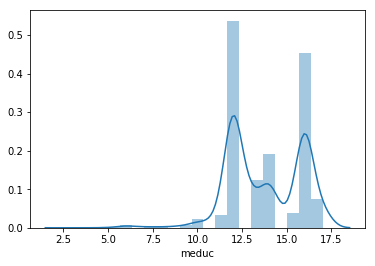

In [12]:
sns.distplot(birthweight_dropped['meduc'])

Looks like camel humps...

Less distince mode - replacing with mean would reduce the significance of the two distinct humps but due to the small number of NaNs in column is probably the best option.

Probably best replace with rounded mean (14 years)

In [38]:
birthweight['meduc'] = birthweight['meduc'].fillna(birthweight_dropped['meduc'].mean().round(0))

#### monpre
month prenatal care began

Can be 0 to 9 - categorical again

5 NaNs in column

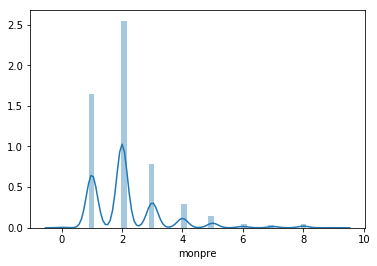

In [17]:
sns.distplot(birthweight_dropped['monpre'])

Replace with rounded mean (2)

In [53]:
birthweight['monpre'] = birthweight['monpre'].fillna(birthweight_dropped['monpre'].mean().round(0))

#### npvis
total number of prenatal visits

Should be Integer number even though currently float in DF

68 NaNs in column

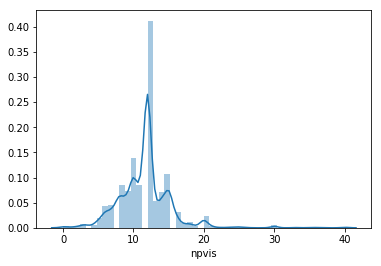

In [19]:
sns.distplot(birthweight_dropped['npvis'])

Looks like normal distribution around 12

Replace NaNs with rounded mean or mode - which both gives 12

In [22]:
birthweight['npvis'] = birthweight['npvis'].fillna(birthweight_dropped['npvis'].mean().round(0))

#### fage
father's age, years

Should be Integer

6 NaNs in column

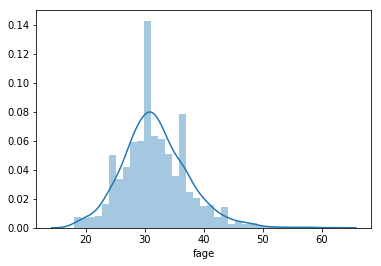

In [23]:
sns.distplot(birthweight_dropped['fage'])

Looks normally distributed with some anomalies

Best replace with rounded mean

In [24]:
birthweight['fage'] = birthweight['fage'].fillna(birthweight_dropped['fage'].mean().round(0))

#### feduc
father's educ, years

Should be Integer

47 NaNs in column

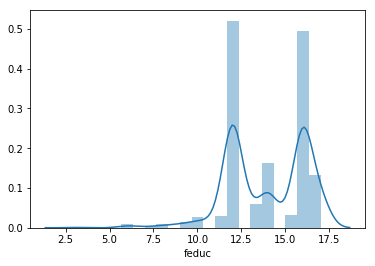

In [25]:
sns.distplot(birthweight_dropped['feduc'])

Similar distribution to Meduc

Less distince mode - replacing with mean would reduce the significance of the two distinct humps but due to the small number of NaNs in column is probably the best option.

In [26]:
birthweight['feduc'] = birthweight['feduc'].fillna(birthweight_dropped['feduc'].mean().round(0))

#### omaps
one minute apgar score

Seems to be integer number

2 NaNs in column

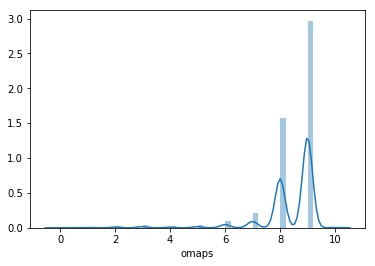

In [27]:
sns.distplot(birthweight_dropped['omaps'])

Only 2 NaNs - replace with mean or mode won't have a significant influence.

In [28]:
birthweight['omaps'] = birthweight['omaps'].fillna(birthweight_dropped['omaps'].mean().round(0))

#### fmaps
five minute apgar score 

Seems to be integer number

2 NaNs in column

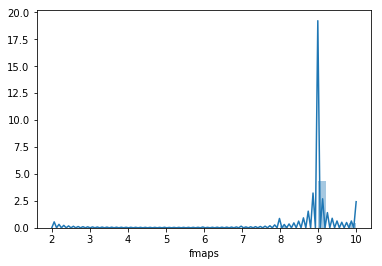

In [29]:
sns.distplot(birthweight_dropped['fmaps'])

Only 2 NaNs - replace with rounded mean

In [30]:
birthweight['fmaps'] = birthweight['fmaps'].fillna(birthweight_dropped['fmaps'].mean().round(0))

#### cigs
avg cigarettes per day

110 NaNs in column

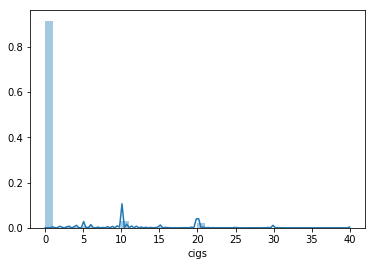

In [31]:
sns.distplot(birthweight_dropped['cigs'])

90% don't smoke. It might be assumed that the NaNs are people that smoke but due to the stigma didn't want to respond. But NaNs can't be replaced with the mean (~1) as this value doesn't naturally occur. Best option to replace with mode (0) even though this is not ideal.

In [54]:
birthweight['cigs'] = birthweight['cigs'].fillna(0)

#### drink
avg drinks per week

115 NaNs in column

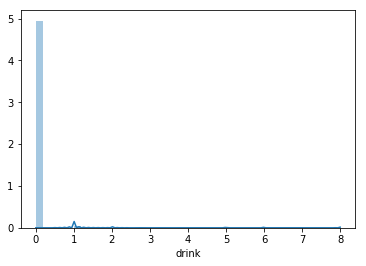

In [33]:
sns.distplot(birthweight_dropped['drink'])

Most don't drink. It might be assumed that the NaNs are people that drink but due to the stigma didn't want to respond. Best option to replace with mode (0) even though this is not ideal.

In [50]:
birthweight['drink'] = birthweight['drink'].fillna(birthweight_dropped['drink'].mean().round(0))

### Outlier analysis

In [57]:
birthweight_quantiles = birthweight.loc[:, :].quantile([0.20,0.40,0.60,0.80,1.00])
birthweight_quantiles

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,bwght,m_meduc,m_monpre,m_npvis,m_fage,m_feduc,m_omaps,m_fmaps,m_cigs,m_drink
0.2,26.0,12.0,1.0,9.0,28.0,12.0,8.0,9.0,0.0,0.0,...,2985.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,28.0,12.0,2.0,12.0,30.0,12.0,8.0,9.0,0.0,0.0,...,3295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,31.0,14.0,2.0,12.0,33.0,16.0,9.0,9.0,0.0,0.0,...,3559.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.8,33.0,16.0,3.0,14.0,36.0,16.0,9.0,9.0,0.0,0.0,...,3845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,44.0,17.0,9.0,40.0,64.0,17.0,10.0,10.0,40.0,8.0,...,5204.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Distribution plots

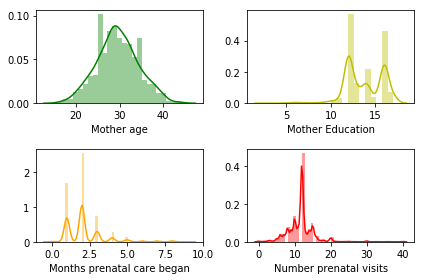

In [60]:
plt.subplot(2, 2, 1)
sns.distplot(birthweight['mage'],
             color = 'g')
plt.xlabel("Mother age")

plt.subplot(2, 2, 2)
sns.distplot(birthweight['meduc'],
             color = 'y')
plt.xlabel('Mother Education')

plt.subplot(2, 2, 3)
sns.distplot(birthweight['monpre'],
             color = 'orange')
plt.xlabel('Months prenatal care began')

plt.subplot(2, 2, 4)
sns.distplot(birthweight['npvis'],
             color = 'r')
plt.xlabel('Number prenatal visits')

plt.tight_layout()
plt.savefig('Birthweight Histograms 1 of 5.png')

plt.show()

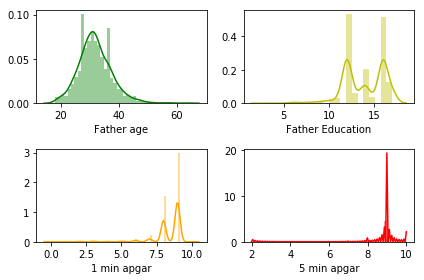

In [59]:
plt.subplot(2, 2, 1)
sns.distplot(birthweight['fage'],
             color = 'g')
plt.xlabel("Father age")

plt.subplot(2, 2, 2)
sns.distplot(birthweight['feduc'],
             color = 'y')
plt.xlabel('Father Education')

plt.subplot(2, 2, 3)
sns.distplot(birthweight['omaps'],
             color = 'orange')
plt.xlabel('1 min apgar')

plt.subplot(2, 2, 4)
sns.distplot(birthweight['fmaps'],
             color = 'r')
plt.xlabel('5 min apgar')

plt.tight_layout()
plt.savefig('Birthweight Histograms 2 of 5.png')

plt.show()

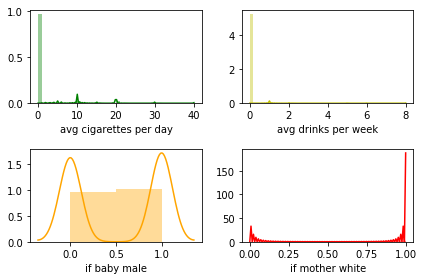

In [64]:
plt.subplot(2, 2, 1)
sns.distplot(birthweight['cigs'],
             color = 'g')
plt.xlabel("avg cigarettes per day")

plt.subplot(2, 2, 2)
sns.distplot(birthweight['drink'],
             color = 'y')
plt.xlabel('avg drinks per week')

plt.subplot(2, 2, 3)
sns.distplot(birthweight['male'],
             bins = 2,
             color = 'orange')
plt.xlabel('if baby male')

plt.subplot(2, 2, 4)
sns.distplot(birthweight['mwhte'],
             bins = 2,
             color = 'r')
plt.xlabel('if mother white')

plt.tight_layout()
plt.savefig('Birthweight Histograms 3 of 5.png')

plt.show()

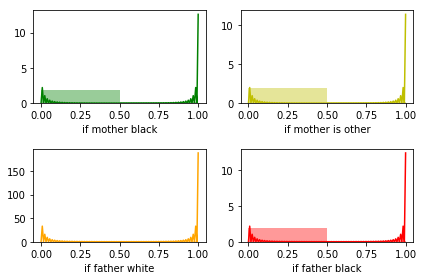

In [65]:
plt.subplot(2, 2, 1)
sns.distplot(birthweight['mblck'],
             bins = 2,
             color = 'g')
plt.xlabel("if mother black")

plt.subplot(2, 2, 2)
sns.distplot(birthweight['moth'],
             bins = 2,
             color = 'y')
plt.xlabel('if mother is other')

plt.subplot(2, 2, 3)
sns.distplot(birthweight['fwhte'],
             bins = 2,
             color = 'orange')
plt.xlabel('if father white')

plt.subplot(2, 2, 4)
sns.distplot(birthweight['fblck'],
             bins = 2,
             color = 'r')
plt.xlabel('if father black')

plt.tight_layout()
plt.savefig('Birthweight Histograms 4 of 5.png')

plt.show()

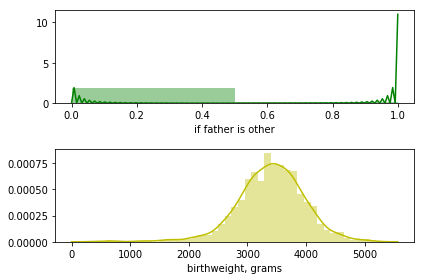

In [66]:
plt.subplot(2, 1, 1)
sns.distplot(birthweight['foth'],
             bins = 2,
             color = 'g')
plt.xlabel("if father is other")

plt.subplot(2, 1, 2)
sns.distplot(birthweight['bwght'],
             color = 'y')
plt.xlabel('birthweight, grams')

plt.tight_layout()
plt.savefig('Birthweight Histograms 5 of 5.png')

plt.show()

#### Check race columns
Father and mother can only either be black, white or other, so the sum of these three needs to always be 1

In [71]:
fchck = birthweight['foth']+birthweight['fblck']+birthweight['fwhte']
fchck[fchck != 1].sum()

0

In [72]:
mchck = birthweight['moth']+birthweight['mblck']+birthweight['mwhte']
mchck[mchck != 1].sum()

0

all good here